In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
df = sns.load_dataset("iris")

In [41]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [42]:
df.shape

(150, 5)

In [43]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [44]:
df['species'] = le.fit_transform(df['species'])

In [45]:
df = df[df['species'] != 0][['sepal_width','petal_length','species']]

In [46]:
df.head()

,sepal_width,petal_length,species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


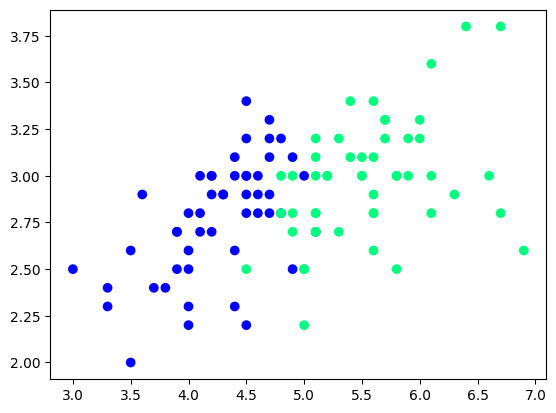

In [47]:
plt.scatter(df['petal_length'],df['sepal_width'], c= df['species'], cmap= 'winter')
plt.show()

In [50]:
df= df.sample(100)

In [83]:
df_train = df.iloc[:60,:].sample(40)
df_val = df.iloc[60:80,:].sample(10)
df_test = df.iloc[80:100,:].sample(10)

In [84]:
df_train.head()

,sepal_width,petal_length,species
127,3.0,4.9,2
115,3.2,5.3,2
81,2.4,3.7,1
110,3.2,5.1,2
97,2.9,4.3,1


In [85]:
df_val.head()

,sepal_width,petal_length,species
69,2.5,3.9,1
108,2.5,5.8,2
123,2.7,4.9,2
64,2.9,3.6,1
94,2.7,4.2,1


In [86]:
df_test.head()

,sepal_width,petal_length,species
51,3.2,4.5,1
71,2.8,4.0,1
105,3.0,6.6,2
59,2.7,3.9,1
72,2.5,4.9,1


In [87]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

# bagging

In [139]:
df_bag = df_train.sample(12,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

In [137]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf,feature_names =X.columns)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

# Bagging - Training

# Bag1 Model 1

In [134]:
bag1 = DecisionTreeClassifier()

In [135]:
bag1.fit(X,y)

DecisionTreeClassifier()

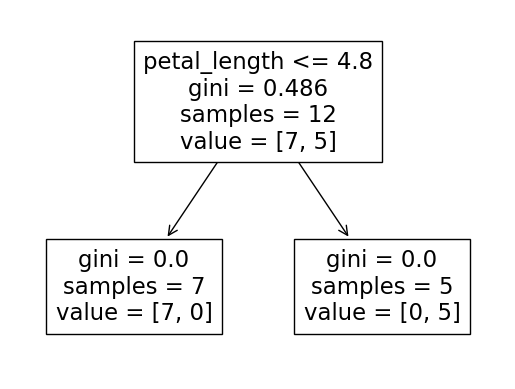

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


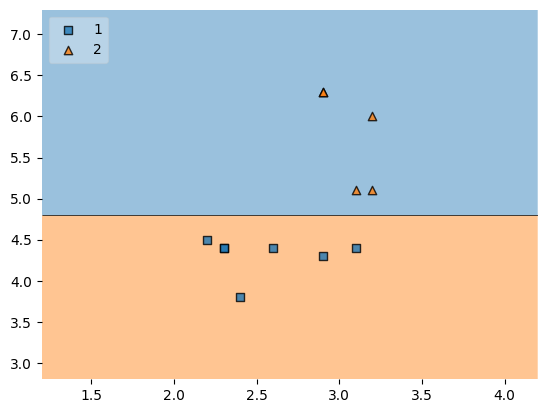

In [138]:
evaluate(bag1,X,y)

# Bag 2 model 2

In [140]:
df_bag = df_train.sample(12,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

In [141]:
bag2 = DecisionTreeClassifier()

In [142]:
bag2.fit(X,y)

DecisionTreeClassifier()

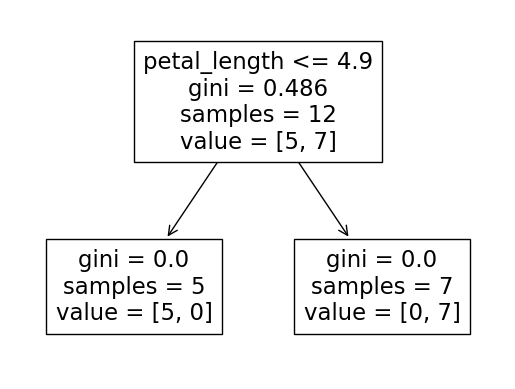

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


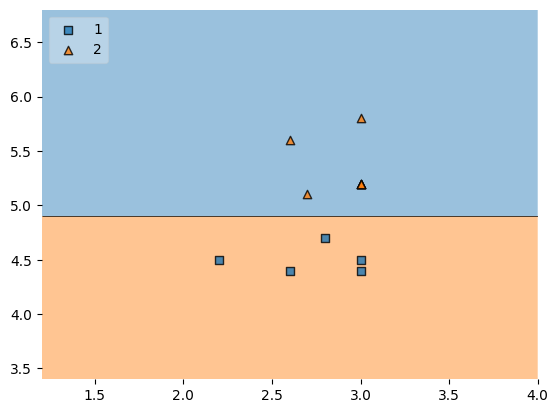

In [143]:
evaluate(bag2,X,y)

# Bag 3 model

In [144]:
bag3 = DecisionTreeClassifier()

In [145]:
df_bag = df_train.sample(12,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

In [146]:
bag3.fit(X,y)

DecisionTreeClassifier()

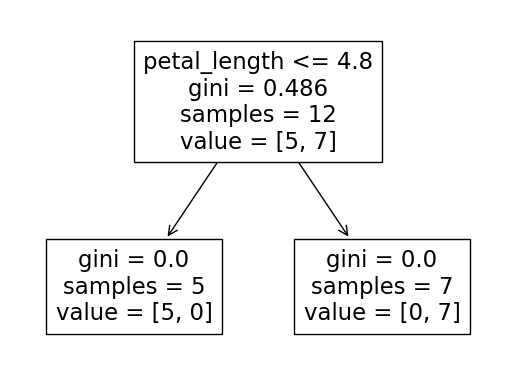

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


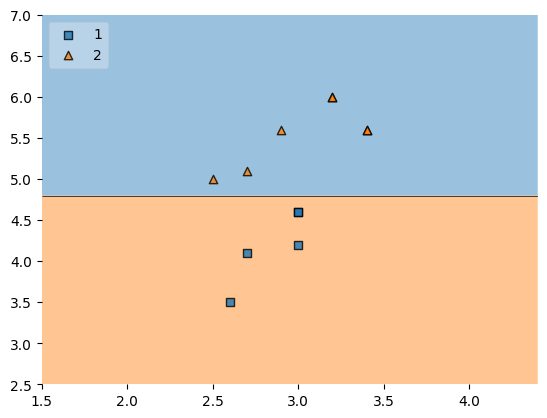

In [147]:
evaluate(bag3,X,y)

# Predcition

In [118]:
df_test.head(2)

,sepal_width,petal_length,species
51,3.2,4.5,1
71,2.8,4.0,1


In [121]:
print("Predictor 1",bag1.predict(np.array([4.2,3.0]).reshape(1,2)))
print("Predictor 2",bag2.predict(np.array([4.2,3.0]).reshape(1,2)))
print("Predictor 3",bag3.predict(np.array([4.2,3.0]).reshape(1,2)))

Predictor 1 [1]
Predictor 2 [1]
Predictor 3 [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Tpes of bagging based on the data sampling

# 1. Pasting : row sampling without replacment

In [149]:
past = df.sample(10)
past

,sepal_width,petal_length,species
94,2.7,4.2,1
105,3.0,6.6,2
97,2.9,4.3,1
127,3.0,4.9,2
115,3.2,5.3,2
139,3.1,5.4,2
59,2.7,3.9,1
101,2.7,5.1,2
92,2.6,4.0,1
131,3.8,6.4,2


# 2 . Random Subspaces  : Columuns sampleing with or without replacement

In [154]:
r_df = df.sample(2,replace = False , axis =1)
r_df

,petal_length,sepal_width
140,5.6,3.1
85,4.5,3.4
131,6.4,3.8
107,6.3,2.9
132,5.6,2.8
...,...,...
95,4.2,3.0
88,4.1,3.0
82,3.9,2.7
105,6.6,3.0


# Random Patches : both row sampleling and column sampling is done

In [157]:
new_df = df.sample(10,replace = True).sample(2,replace = True , axis =1)
new_df

,petal_length,species
61,4.2,1
113,5.0,2
97,4.3,1
89,4.0,1
93,3.3,1
83,5.1,1
109,6.1,2
107,6.3,2
89,4.0,1
79,3.5,1
